In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [54]:
with open('data.jsonl', 'r') as json_file:
    json_list = list(json_file)

text = []
label = []
for json_str in json_list:
    result = json.loads(json_str)
    text.append(result['text'])
    label.append(result['label'])


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

# Fit and transform vectorizer on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)


y_pred = naive_bayes_classifier.predict(X_test_tfidf)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     24504
           1       0.79      0.98      0.87     28247
           2       0.96      0.46      0.63      6853
           3       0.94      0.77      0.85     11339
           4       0.90      0.72      0.80      9376
           5       0.99      0.28      0.44      3043

    accuracy                           0.85     83362
   macro avg       0.91      0.70      0.75     83362
weighted avg       0.86      0.85      0.83     83362

Confusion Matrix:
 [[23451   844    15   126    66     2]
 [  527 27556    79    39    45     1]
 [  414  3208  3181    34    15     1]
 [ 1369  1012    15  8781   160     2]
 [ 1206  1072    10   367  6714     7]
 [  387  1309     4    22   458   863]]
Accuracy Score: 0.8462608862551282


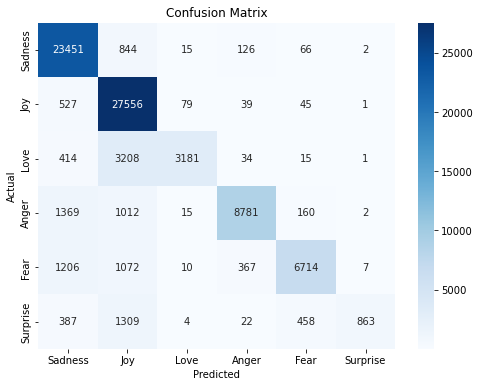

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)


emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()